# Apresentação das Técnicas de Classificação 1

## Base de Dados Sintética

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1_000,
    n_features=10,
    n_classes=2,
    n_informative=2,
    n_clusters_per_class=2,
    class_sep=0.5,
    random_state=42,
    )

X.shape, y.shape

((1000, 10), (1000,))

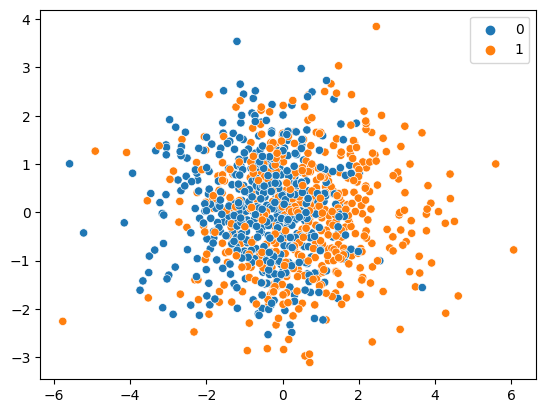

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

dec = PCA(n_components=2, random_state=42)

dec.fit(X)
Xd = dec.transform(X)

g = sns.scatterplot(x=Xd[:,0],y=Xd[:,1],hue=y)

In [ ]:
import pandas as pd
# nome das colunas
nome_atributos = [f'col{i+1}' for i in range(0,X.shape[1])]
# criando DataFrame com a Base de Dados
bd = pd.DataFrame(data=X, columns=nome_atributos)
bd['tutor'] = y
bd.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,tutor
0,0.950513,-0.066449,0.816279,-0.358079,0.997266,1.181890,-1.115679,-1.210161,-1.128077,1.227274,0
1,-0.902225,-0.566395,-0.838125,0.831617,-1.176962,1.820544,1.252375,-0.984534,0.863896,0.209470,1
2,-0.095198,-0.432774,-0.287160,0.793818,-0.268646,-1.836360,0.739086,-0.246383,-0.558145,-0.297376,1
3,1.326707,2.023606,1.323417,0.006800,-1.607661,0.184741,-2.119427,-0.357445,-0.973127,-0.190039,0
4,0.198979,-0.711303,0.143965,0.117124,1.536061,0.597538,-0.151355,-0.939156,-0.324085,0.236224,1


In [ ]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    1000 non-null   float64
 1   col2    1000 non-null   float64
 2   col3    1000 non-null   float64
 3   col4    1000 non-null   float64
 4   col5    1000 non-null   float64
 5   col6    1000 non-null   float64
 6   col7    1000 non-null   float64
 7   col8    1000 non-null   float64
 8   col9    1000 non-null   float64
 9   col10   1000 non-null   float64
 10  tutor   1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [ ]:
bd.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1000.0,0.029704,0.693659,-2.857531,-0.379822,0.033389,0.437461,2.808290
col2,1000.0,-0.015168,1.001338,-3.221016,-0.699467,-0.028277,0.691488,3.098299
col3,1000.0,0.021475,0.655861,-2.422365,-0.375888,0.076253,0.406711,2.453217
col4,1000.0,-0.027417,0.994598,-2.991136,-0.695500,-0.012086,0.672219,3.109919
col5,1000.0,-0.036508,1.037675,-3.007632,-0.721686,-0.055906,0.644151,3.152057
col6,1000.0,0.029886,0.986939,-2.832156,-0.623122,0.034297,0.667746,3.117681
col7,1000.0,-0.022545,1.099405,-4.043441,-0.718192,-0.146798,0.670385,3.520262
col8,1000.0,-0.082698,1.048987,-3.688365,-0.796008,-0.076948,0.603682,3.926238
col9,1000.0,-0.048433,1.009951,-3.580534,-0.674638,-0.165983,0.629048,3.494644
col10,1000.0,0.025112,1.002531,-3.019512,-0.660088,0.017219,0.693013,3.243093


### EDA - Análise de Dados Exploratória

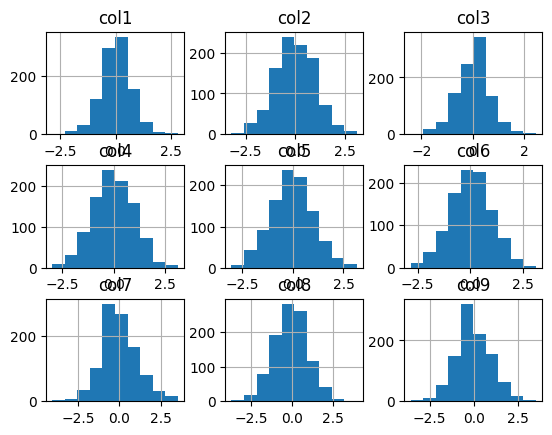

In [ ]:
g = bd[bd.columns[:9]].hist()

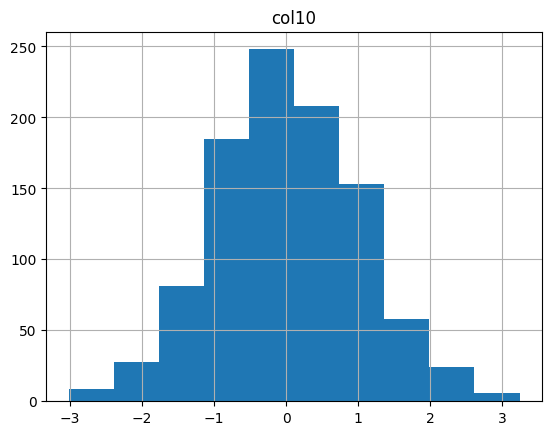

In [ ]:
g = bd[bd.columns[9:-1]].hist()

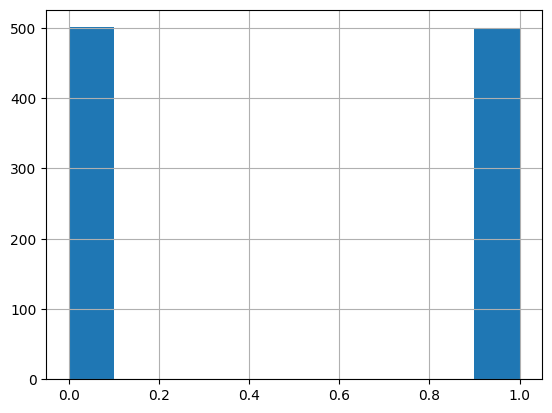

In [ ]:
g = bd[bd.columns[-1]].hist()

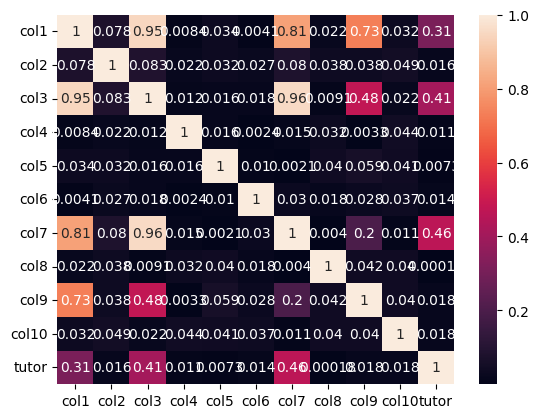

In [ ]:
import seaborn as sns

g = sns.heatmap(abs(bd.corr()),annot=True)

In [ ]:
X = bd.drop(['col3','col4','tutor'],axis=1).values

## Técnica de Aprendizado de Máquina Classificador

In [ ]:
from sklearn.model_selection import GridSearchCV

def avaliador(tecnicas:list):
  res = []
  for t in tecnicas:
    # nome da técnica
    nome = t.__class__.__name__
    # cross validation da técnica
    cv = GridSearchCV(t,{},cv=5)
    # treinamento
    try:
      cv.fit(X,y)
      # resultados
      dn = {
          'nome': nome,
          'fit_time': cv.cv_results_['mean_fit_time'][0],
          'test_score': cv.cv_results_['mean_test_score'][0],
          'info':'-',
      }
    except Exception as e:
      dn={'nome': nome,'info':str(e)}
    # adicionando resultado
    res.append(dn)
  return pd.DataFrame(res)

https://scikit-learn.org/stable/modules/linear_model.html

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_logistic_001.png" />

In [ ]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression

avaliador([
    RidgeClassifier(random_state=42),
    LogisticRegression(random_state=42),
])

,nome,fit_time,test_score,info
0,RidgeClassifier,0.004152,0.734,-
1,LogisticRegression,0.004296,0.737,-


In [ ]:
from sklearn.dummy import DummyClassifier

avaliador([DummyClassifier(random_state=42)])

,nome,fit_time,test_score,info
0,DummyClassifier,0.000457,0.501,-


https://scikit-learn.org/stable/modules/lda_qda.html

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_lda_qda_001.png" />

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

avaliador([
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
])

/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,nome,fit_time,test_score,info
0,LinearDiscriminantAnalysis,0.003284,0.734,-
1,QuadraticDiscriminantAnalysis,0.001877,0.667,-


https://scikit-learn.org/stable/modules/gaussian_process.html

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_gpc_iris_001.png" />

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

avaliador([GaussianProcessClassifier(kernel=(1.0 * RBF(1.0)), random_state=42)])

,nome,fit_time,test_score,info
0,GaussianProcessClassifier,8.803065,0.734,-


https://scikit-learn.org/stable/modules/naive_bayes.html

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*39U1Ln3tSdFqsfQy6ndxOA.png" />

In [ ]:
from sklearn.naive_bayes import (BernoulliNB, CategoricalNB, ComplementNB,
                                 MultinomialNB, GaussianNB)

from sklearn.preprocessing import MinMaxScaler

pre = MinMaxScaler()
X = pre.fit_transform(X)

avaliador([
    BernoulliNB(),
    CategoricalNB(),
    ComplementNB(),
    MultinomialNB(),
    GaussianNB(),
    ])

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 106, in predict
    jll = self._joint_log_likelihood(X)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 1530, in _joint_log_likelihood
    jll += self.feature_log_prob_[i][:, indices].T
Inde

,nome,fit_time,test_score,info
0,BernoulliNB,0.005596,0.501,-
1,CategoricalNB,0.005167,NaN,-
2,ComplementNB,0.001210,0.707,-
3,MultinomialNB,0.001162,0.713,-
4,GaussianNB,0.000875,0.704,-


https://scikit-learn.org/stable/modules/neighbors.html

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_classification_002.png" />

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid

avaliador([
    KNeighborsClassifier(),
    RadiusNeighborsClassifier(),
    NearestCentroid(),
])

,nome,fit_time,test_score,info
0,KNeighborsClassifier,0.001164,0.705,-
1,RadiusNeighborsClassifier,0.001238,0.557,-
2,NearestCentroid,0.000671,0.714,-


https://scikit-learn.org/stable/modules/neural_networks_supervised.html

<img src="https://scikit-learn.org/stable/_images/multilayerperceptron_network.png" width="30%" />

In [ ]:
from sklearn.neural_network import MLPClassifier

avaliador([
    MLPClassifier(random_state=42, max_iter=800),
    MLPClassifier(hidden_layer_sizes=(50,10,) , random_state=42, max_iter=800),
    ])

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

,nome,fit_time,test_score,info
0,MLPClassifier,3.436489,0.745,-
1,MLPClassifier,1.804392,0.750,-


https://scikit-learn.org/stable/modules/svm.html

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png" />

In [ ]:
from sklearn.svm import LinearSVC, NuSVC, SVC

avaliador([
    LinearSVC(),
    NuSVC(),
    SVC(),
])

,nome,fit_time,test_score,info
0,LinearSVC,0.008822,0.733,-
1,NuSVC,0.050345,0.715,-
2,SVC,0.024291,0.733,-


https://scikit-learn.org/stable/modules/tree.html

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dtc_002.png" />

In [ ]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

avaliador([
    DecisionTreeClassifier(random_state=42, max_depth=5),
    ExtraTreeClassifier(random_state=42, max_depth=15),
])

,nome,fit_time,test_score,info
0,DecisionTreeClassifier,0.004931,0.782,-
1,ExtraTreeClassifier,0.001179,0.680,-


https://scikit-learn.org/stable/modules/ensemble.html

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_forest_iris_001.png" />

In [ ]:
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier,
                              ExtraTreesClassifier, GradientBoostingClassifier,
                              RandomForestClassifier, HistGradientBoostingClassifier)

avaliador([
    AdaBoostClassifier(random_state=42),
    BaggingClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    HistGradientBoostingClassifier(random_state=42),
])

,nome,fit_time,test_score,info
0,AdaBoostClassifier,0.129797,0.755,-
1,BaggingClassifier,0.052624,0.781,-
2,ExtraTreesClassifier,0.170191,0.800,-
3,GradientBoostingClassifier,0.286239,0.782,-
4,RandomForestClassifier,0.258260,0.801,-
5,HistGradientBoostingClassifier,0.324291,0.798,-


# Atividade

Realize as etapas da apresentação acima com esta nova base de dados

## Base de Dados Sintética

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=1000,
    n_features=10,
    centers=2,
    cluster_std=10.,
    random_state=42)

X.shape, y.shape

((1000, 10), (1000,))

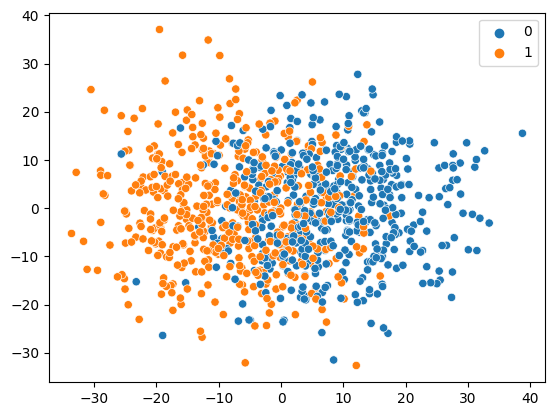

In [ ]:
from sklearn.decomposition import PCA

dec = PCA(n_components=2, random_state=42)

dec.fit(X)
Xd = dec.transform(X)

g = sns.scatterplot(x=Xd[:,0],y=Xd[:,1],hue=y)

In [ ]:
import pandas as pd
# nome das colunas
nome_atributos = [f'col{i+1}' for i in range(0,X.shape[1])]
# criando DataFrame com a Base de Dados
bd = pd.DataFrame(data=X, columns=nome_atributos)
bd['tutor'] = y
bd.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,tutor
0,-6.378334,19.420559,22.251408,-25.269247,-19.517914,6.762531,-6.684049,-6.222079,-13.902709,-9.725584,1
1,1.903874,1.682724,6.929843,-16.605845,-0.847152,-3.898525,-2.451726,17.904706,5.698499,5.642346,0
2,8.378499,5.251279,4.828069,-9.743374,10.077602,12.092777,-7.271390,17.558829,3.775168,-9.205803,0
3,-6.526965,7.087602,-5.269894,13.682071,-13.960231,0.304554,6.680501,-5.057676,9.019026,3.466715,1
4,-5.403165,4.431687,15.879301,-1.692278,-14.505033,-17.983930,-18.518179,2.374546,4.363614,2.334240,1


In [ ]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    1000 non-null   float64
 1   col2    1000 non-null   float64
 2   col3    1000 non-null   float64
 3   col4    1000 non-null   float64
 4   col5    1000 non-null   float64
 5   col6    1000 non-null   float64
 6   col7    1000 non-null   float64
 7   col8    1000 non-null   float64
 8   col9    1000 non-null   float64
 9   col10   1000 non-null   float64
 10  tutor   1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [ ]:
bd.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1000.0,-6.081426,10.724960,-37.607426,-13.073280,-6.327867,1.158565,29.921732
col2,1000.0,9.245705,10.311675,-26.612654,1.983536,9.159029,16.103332,40.391771
col3,1000.0,5.409548,9.852061,-25.436445,-0.941425,5.650559,11.760995,40.422682
col4,1000.0,-1.506216,10.336331,-29.793868,-8.525805,-1.417739,5.732312,40.500485
col5,1000.0,-6.511587,10.063272,-45.587503,-12.856979,-6.511490,0.122852,23.888977
col6,1000.0,-6.281587,10.169504,-43.215563,-12.980665,-6.414441,0.449685,28.958642
col7,1000.0,-6.630188,10.083626,-41.251001,-13.729491,-6.615052,-0.059595,24.736965
col8,1000.0,3.478920,10.415622,-28.936287,-3.503590,3.652126,10.748015,33.340354
col9,1000.0,0.506609,10.231160,-32.746246,-6.026493,0.344864,7.498922,29.574478
col10,1000.0,-0.298833,11.277528,-34.621983,-8.137742,0.080570,7.379200,43.423829


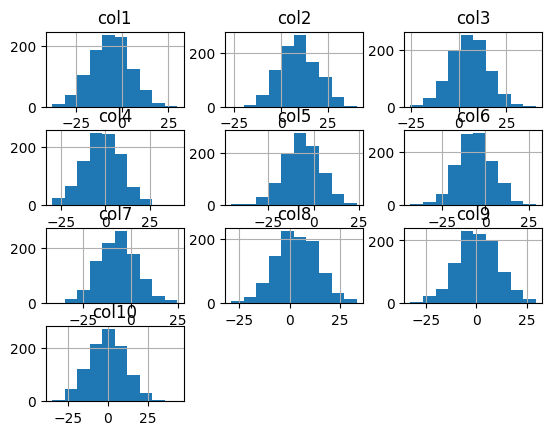

In [ ]:
g = bd[bd.columns[:-1]].hist()

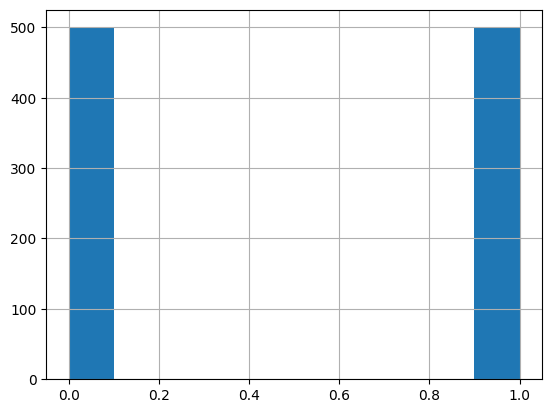

In [ ]:
g = bd[bd.columns[-1]].hist()

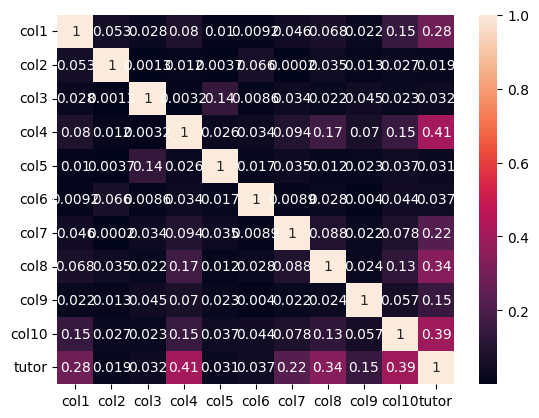

In [ ]:
import seaborn as sns

g = sns.heatmap(abs(bd.corr()),annot=True)

In [ ]:
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.model_selection import GridSearchCV
from tqdm.notebook import tqdm
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier,
                              ExtraTreesClassifier, GradientBoostingClassifier,
                              RandomForestClassifier, HistGradientBoostingClassifier)
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import (BernoulliNB, GaussianNB)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

tecnicas = [

    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),

    GaussianProcessClassifier(kernel=(1.0 * RBF(1.0)), random_state=42),

    BernoulliNB(),
    GaussianNB(),

    KNeighborsClassifier(),
    NearestCentroid(),

    MLPClassifier(hidden_layer_sizes=(512,256,128,64,32,16,8,4,2,), random_state=42, max_iter=1000),

    LinearSVC(),
    NuSVC(),
    SVC(),
    DummyClassifier(random_state=42),
    RidgeClassifier(random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    BaggingClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    HistGradientBoostingClassifier(random_state=42),
]

res = []
for t in tqdm(tecnicas):
  # nome da técnica
  nome = str(t)
  # cross validation da técnica
  cv = GridSearchCV(t,{},cv=5)
  # treinamento
  try:
    cv.fit(X,y)
    # resultados
    dn = {
        'nome': nome,
        'fit_time': cv.cv_results_['mean_fit_time'][0],
        'test_score': cv.cv_results_['mean_test_score'][0],
        'info':'-',
    }
  except Exception as e:
    dn={'nome': nome,'info':str(e)}
  # adicionando resultado
  res.append(dn)
dfres = pd.DataFrame(res)
dfres.sort_values('test_score',ascending=False)

  0%|          | 0/21 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

,nome,fit_time,test_score,info
0,LinearDiscriminantAnalysis(),0.006367,0.780,-
12,RidgeClassifier(random_state=42),0.002323,0.780,-
6,NearestCentroid(),0.000812,0.776,-
13,LogisticRegression(random_state=42),0.007312,0.773,-
4,GaussianNB(),0.002981,0.769,-
17,ExtraTreesClassifier(random_state=42),0.175760,0.768,-
1,QuadraticDiscriminantAnalysis(),0.003540,0.764,-
10,SVC(),0.020678,0.764,-
9,NuSVC(),0.026569,0.760,-
19,RandomForestClassifier(random_state=42),0.294856,0.755,-
